# Titanic Dataset - Exploratory Data Analysis (EDA)
#### Author: Wojciech Domino
#### Date: 2025
---

This notebook performs an Exploratory Data Analysis (EDA) on the Titanic dataset.  
We will investigate the key factors that influenced the survival of passengers, perform data cleaning, and create visualizations to better understand the dataset.

**Objectives:**
- Understand the structure of the dataset
- Handle missing values
- Explore relationships between features
- Generate meaningful insights

---

Step 1: Importing Libraries and Loading the Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set_style('whitegrid')

# Load the dataset
df = pd.read_csv('../data/train.csv')

# Basic Information
print("Dataset Info:")
print(df.info())

# Dataset Description
print("\nDataset Description:")
print(df.describe())

# Checking Missing Values
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Description:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523

Step 2: Data Cleaning

In [3]:
# Fill missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop Cabin column due to excessive missing values
df.drop('Cabin', axis=1, inplace=True)

# Fill missing Embarked values with the most frequent one
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Verify no missing values left
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_6104\172360460.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_6104\172360460.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Step 3: Data Visualization

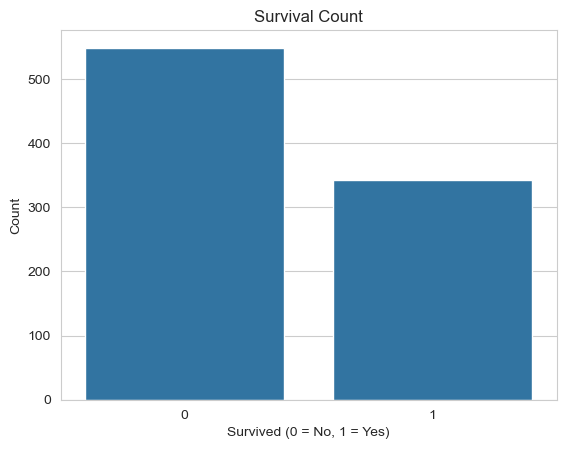

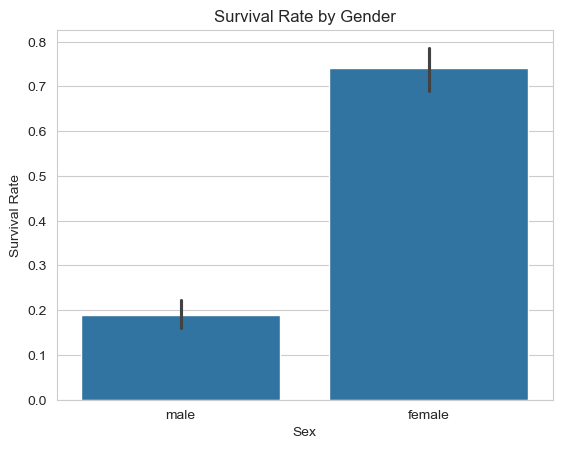

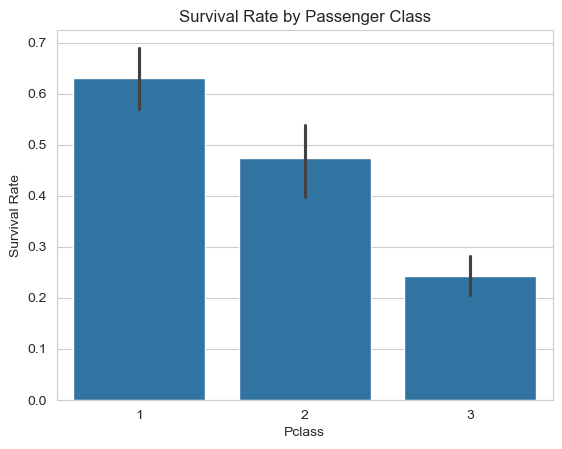

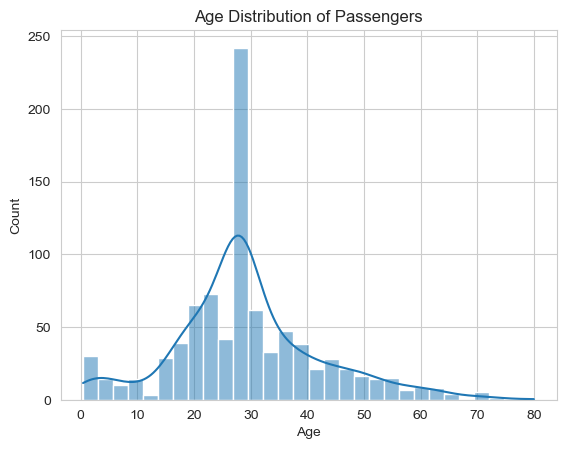

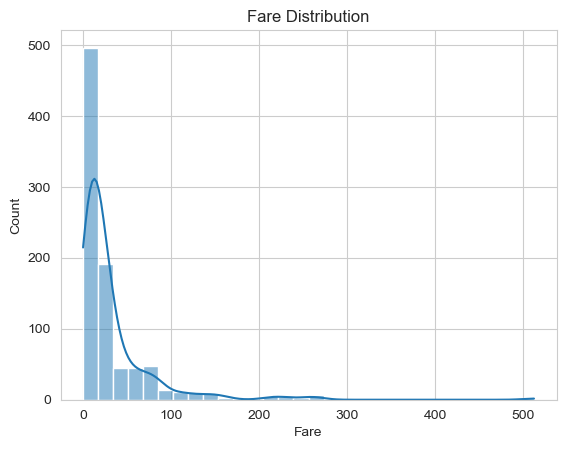

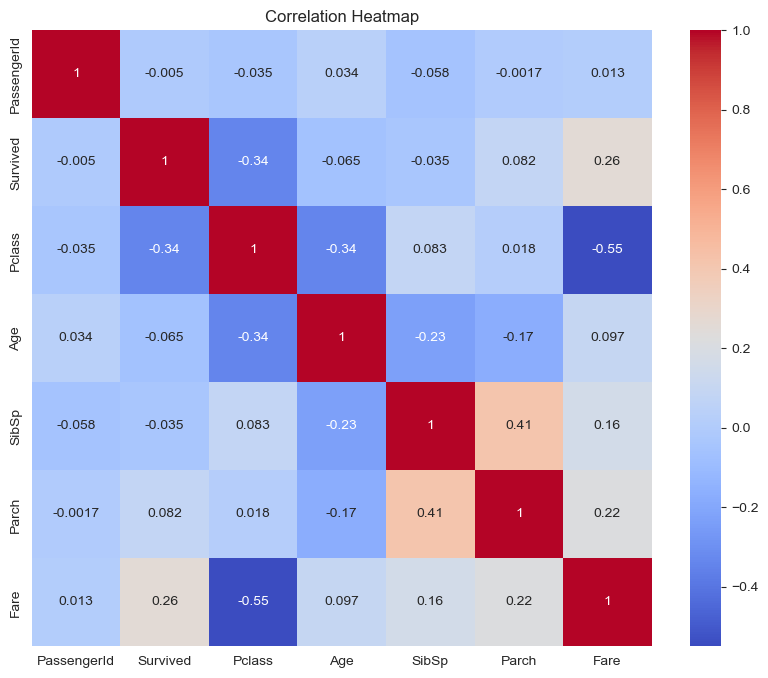

In [7]:
# Survival Count
sns.countplot(data=df, x='Survived')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival Rate by Gender
sns.barplot(data=df, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# Survival Rate by Passenger Class
sns.barplot(data=df, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Age Distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

# Fare Distribution
sns.histplot(data=df, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Key Insights:
- Female passengers had significantly higher survival rates than male passengers.
- Passengers from higher classes (Pclass 1) were more likely to survive.
- Younger passengers had slightly better chances of survival.
- Higher ticket fares correlated positively with survival probability.

Thanks for jumping into my notebook. Have a nice day :)